In [1]:
#Import dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.decomposition import *


In [2]:
import os
cwd = os.getcwd()
cwd

'G:\\Data_lit'

In [3]:
df_train_path = 'G:/Data_lit/house-prices-advanced-regression-techniques/train.csv'
df_test_path = 'G:/Data_lit/house-prices-advanced-regression-techniques/test.csv'

In [4]:
#Importing test and training data
df_train = pd.read_csv(df_train_path)
df_test = pd.read_csv(df_test_path)

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#set index
df_train.drop(columns = 'Id', inplace =True,axis=1)
df_test.drop(columns = 'Id', inplace =True,axis=1)

In [7]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#Separate the response variable from the independent variables
target = df_train['SalePrice']

In [9]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [10]:
df_train.drop(columns ='SalePrice', axis =1, inplace=True)

In [11]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [12]:
df_train.Alley.isnull().sum().sum()

1369

In [13]:
df_test.Alley.isnull().sum().sum()

1352

In [14]:
#shape of whole dataset
df_train.shape

(1460, 79)

In [15]:
#Drop alley since it contains nulls for more than half of data
df_train.drop(columns = 'Alley', axis=1, inplace = True)
df_test.drop(columns = 'Alley', axis=1, inplace = True)

In [16]:
df_train.columns.isnull().sum()


0

In [17]:
#checking nulls in columns
for column in df_train:
    if df_train[column].isnull().any():
       print('{0} has {1} null values'.format(column, df_train[column].isnull().sum()))

LotFrontage has 259 null values
MasVnrType has 8 null values
MasVnrArea has 8 null values
BsmtQual has 37 null values
BsmtCond has 37 null values
BsmtExposure has 38 null values
BsmtFinType1 has 37 null values
BsmtFinType2 has 38 null values
Electrical has 1 null values
FireplaceQu has 690 null values
GarageType has 81 null values
GarageYrBlt has 81 null values
GarageFinish has 81 null values
GarageQual has 81 null values
GarageCond has 81 null values
PoolQC has 1453 null values
Fence has 1179 null values
MiscFeature has 1406 null values


In [18]:
#checking nulls in columns
for column in df_test:
    if df_test[column].isnull().any():
       print('{0} has {1} null values'.format(column, df_test[column].isnull().sum()))

MSZoning has 4 null values
LotFrontage has 227 null values
Utilities has 2 null values
Exterior1st has 1 null values
Exterior2nd has 1 null values
MasVnrType has 16 null values
MasVnrArea has 15 null values
BsmtQual has 44 null values
BsmtCond has 45 null values
BsmtExposure has 44 null values
BsmtFinType1 has 42 null values
BsmtFinSF1 has 1 null values
BsmtFinType2 has 42 null values
BsmtFinSF2 has 1 null values
BsmtUnfSF has 1 null values
TotalBsmtSF has 1 null values
BsmtFullBath has 2 null values
BsmtHalfBath has 2 null values
KitchenQual has 1 null values
Functional has 2 null values
FireplaceQu has 730 null values
GarageType has 76 null values
GarageYrBlt has 78 null values
GarageFinish has 78 null values
GarageCars has 1 null values
GarageArea has 1 null values
GarageQual has 78 null values
GarageCond has 78 null values
PoolQC has 1456 null values
Fence has 1169 null values
MiscFeature has 1408 null values
SaleType has 1 null values


In [19]:
df_train.PoolQC.dropna(inplace=True)

In [20]:
df_train.PoolQC

197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
Name: PoolQC, dtype: object

In [21]:
df_train.Fence.dropna(inplace=True)

In [22]:
df_train.Fence.head()

5     MnPrv
14     GdWo
15    GdPrv
19    MnPrv
21    GdPrv
Name: Fence, dtype: object

In [23]:
df_train.MiscFeature.dropna(inplace=True)

In [24]:
df_train.MiscFeature.head()

5     Shed
7     Shed
16    Shed
17    Shed
51    Shed
Name: MiscFeature, dtype: object

In [25]:
#List of columns to be dropped which contain nulls of more than half of the data
list_dropped = ['PoolQC','Fence', 'MiscFeature']

In [26]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [27]:
df_train.drop(columns = list_dropped, inplace=True, axis=1)
df_test.drop(columns = list_dropped, inplace=True, axis=1)

In [28]:
df_test.shape

(1459, 75)

In [29]:
df_train.shape

(1460, 75)

In [30]:
all_data = pd.concat([df_train, df_test],axis = 0,sort=False, )

In [31]:
#checkingfor datatypes in columns
for column in all_data:
    if all_data[column].isnull().any():
       print('{0} has {1} null values and dtypes {2}'.format(column, all_data[column].isnull().sum(), all_data[column].dtypes))

MSZoning has 4 null values and dtypes object
LotFrontage has 486 null values and dtypes float64
Utilities has 2 null values and dtypes object
Exterior1st has 1 null values and dtypes object
Exterior2nd has 1 null values and dtypes object
MasVnrType has 24 null values and dtypes object
MasVnrArea has 23 null values and dtypes float64
BsmtQual has 81 null values and dtypes object
BsmtCond has 82 null values and dtypes object
BsmtExposure has 82 null values and dtypes object
BsmtFinType1 has 79 null values and dtypes object
BsmtFinSF1 has 1 null values and dtypes float64
BsmtFinType2 has 80 null values and dtypes object
BsmtFinSF2 has 1 null values and dtypes float64
BsmtUnfSF has 1 null values and dtypes float64
TotalBsmtSF has 1 null values and dtypes float64
Electrical has 1 null values and dtypes object
BsmtFullBath has 2 null values and dtypes float64
BsmtHalfBath has 2 null values and dtypes float64
KitchenQual has 1 null values and dtypes object
Functional has 2 null values and dty

In [32]:
all_data.GarageFinish.head()

0    RFn
1    RFn
2    RFn
3    Unf
4    RFn
Name: GarageFinish, dtype: object

In [33]:
#Those with Nulls and dtypes are float can be filled with mean of the column
for column in all_data:
    if all_data[column].dtypes == 'float64':
        all_data[column].fillna(all_data[column].mean(), inplace=True)

In [34]:
#checking nulls in columns and if the float data types have been replaced by mean
for column in all_data:
    if all_data[column].isnull().any():
       print('{0} has {1} null values and dtypes {2}'.format(column, all_data[column].isnull().sum(), all_data[column].dtypes))

MSZoning has 4 null values and dtypes object
Utilities has 2 null values and dtypes object
Exterior1st has 1 null values and dtypes object
Exterior2nd has 1 null values and dtypes object
MasVnrType has 24 null values and dtypes object
BsmtQual has 81 null values and dtypes object
BsmtCond has 82 null values and dtypes object
BsmtExposure has 82 null values and dtypes object
BsmtFinType1 has 79 null values and dtypes object
BsmtFinType2 has 80 null values and dtypes object
Electrical has 1 null values and dtypes object
KitchenQual has 1 null values and dtypes object
Functional has 2 null values and dtypes object
FireplaceQu has 1420 null values and dtypes object
GarageType has 157 null values and dtypes object
GarageFinish has 159 null values and dtypes object
GarageQual has 159 null values and dtypes object
GarageCond has 159 null values and dtypes object
SaleType has 1 null values and dtypes object


In [35]:
#drop the other nulls with dtype object
dropped_list = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1']

In [36]:
all_data.drop(columns = dropped_list,axis=1, inplace = True)



In [37]:
dropped_list2= ['BsmtFinType2','Electrical', 'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']

In [38]:
df_train.drop(columns = dropped_list2,axis=1, inplace = True)


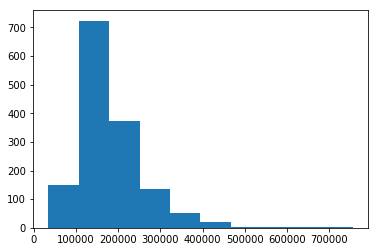

In [39]:
#Quick visualization of the distribution of the response variable
plt.hist(target)
plt.show()

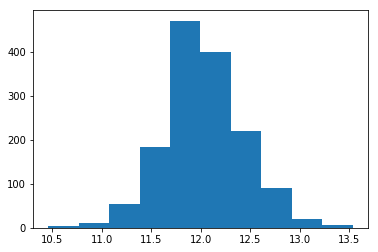

In [40]:
plt.hist(np.log(target))
plt.show()

In [41]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [42]:

from sklearn.preprocessing import LabelEncoder
cols = (  
        'ExterQual', 'ExterCond','HeatingQC',  'KitchenQual',  
         'Functional',  'LandSlope',
        'LotShape', 'PavedDrive', 'Street',  'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 70)


In [43]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 224)


In [44]:
all_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=224)

In [45]:
#Normalize the target
target = np.log(target.values)

In [46]:
target.shape

(1460,)

In [47]:
df_test.shape

(1459, 75)

In [48]:
df_train.shape

(1460, 68)

In [49]:
df_train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal
1459,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,68,0,0,0,0,0,6,2008,WD,Normal


In [53]:
all_data.iloc[:1460].tail()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,10,62.0,7917,1,3,0,6,4,1999,2000,...,0,0,0,1,0,0,0,0,1,0
1456,5,85.0,13175,1,3,0,6,5,1978,1988,...,0,0,0,1,0,0,0,0,1,0
1457,11,66.0,9042,1,3,0,7,8,1941,2006,...,0,0,0,1,0,0,0,0,1,0
1458,5,68.0,9717,1,3,0,5,5,1950,1996,...,0,0,0,1,0,0,0,0,1,0
1459,5,75.0,9937,1,3,0,5,5,1965,1965,...,0,0,0,1,0,0,0,0,1,0


In [55]:
all_data.shape

(2919, 224)

In [54]:
df_train = all_data.iloc[:1460]

In [61]:
df_test = all_data.iloc[1460:2920]

In [63]:
df_test.shape

(1459, 224)

In [65]:
#Modelling
model = BayesianRidge()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size = 0.2)

In [66]:
reg = model.fit(X_train, y_train)

In [67]:
predictions = reg.predict(X_test)

In [68]:
from sklearn.metrics import *

In [69]:
print(r2_score(y_test, predictions))

0.7799686878111881


In [70]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [71]:
print(rmsle(y_test, predictions))

0.19261438289050883


In [73]:
from sklearn.ensemble import *

In [74]:
rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1) 

In [75]:
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)

In [76]:
from sklearn.model_selection import GridSearchCV # Search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV # Search over specified parameter values for an estimator.
from sklearn.model_selection import ShuffleSplit # Random permutation cross-validator

In [ ]:
start = time() # Get start time

rf_regressor = RandomForestRegressor(random_state=42)
cv_sets = ShuffleSplit(random_state = 4) # shuffling our data for cross-validation
parameters = {'n_estimators':[100, 120, 140], 
              'min_samples_leaf':[1, 2, 3], 
              'max_depth':[10,15,20]}
scorer = make_scorer(r2_score)
n_iter_search = 10
grid_obj = RandomizedSearchCV(rf_regressor, 
                              parameters, 
                              n_iter = n_iter_search, 
                              scoring = scorer, 
                              cv = cv_sets,
                              random_state= 99)
grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

end = time() # Get end time
# Calculate training time
rf_time = (end-start)/60
print('It took {0:.2f} minutes for RandomSearchCV to converge to optimised parameters for the RF model'.format(rf_time))